# DLTHON

## DKTC (Dataset of Korean Threatening Conversations)

- 텍스트 다중분류 프로젝트

## 데이터셋 정보

train.csv

    1. idx = 인덱스
    2. class = 0~4
        class 0; 협박 대화
        class 1; 갈취 대화
        class 2; 직장 내 괴롭힘 대화
        class 3; 기타 괴롭힘 대화
    3. conversation = \n으로 구분된 멀티턴 텍스트 대화

test.json

    1. t_### = 인덱스
    2. text = 대화

submission.csv

    1. file_name = 인덱스
    2. class = 예측값

## 평가기준
> - 데이터 EDA와 데이터 전처리가 적절하게 이뤄졌는가?
> - Task에 알맞게 적절한 모델을 찾아보고 선정했는가?
> - 성능향상을 위해 논리적으로 접근했는가?
> - 결과 도출을 위해 여러가지 시도를 진행했는가?
> - 도출된 결론에 충분한 설득력이 있는가?
> - 적절한 metric을 설정하고 그 사용 근거 및 결과를 분석하였는가?
> - 발표가 매끄럽게 진행되었고 발표시간을 준수하였는지? (발표 10분-15분)

## TO-DO-LIST
- 일반 대화 데이터셋 만들어야함 (800-1000개정도)
- ppt 제작
- 평가지표 : f1-score

## EDA


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import os
import pandas as pd

train_data_path ="./data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [22]:
train_data.shape

(3950, 3)

In [23]:
add_data = pd.read_csv('normal_df.csv')
add_data.head()

,conversation,class
0,요즘 동물들을 유기 하는 애들도 참 문제야 ㅠㅠ\n 동물들을 유기 하는 사람이 ...,일반 대화
1,강릉에 어떤 호텔에서 오징어 게임 한데\n 오징어게임? 설마 죽는 거 아이제 ...,일반 대화
2,이렇게 너와 내가 국제 관계를 트는구나\n 그래 해외에 친구가 있는 것도 나쁘지...,일반 대화
3,너는 전철 자주 타고 다니는 편이야?\n 예전엔 많이 타고 다녔는데 요즘 통 안...,일반 대화
4,귀멸의 칼날 봤니?\n 응 당연 봤지\n 안 볼 수가 없지\n 명작\n 키키...,일반 대화


In [24]:
add_data.shape

(18000, 2)

In [25]:
train_data.drop('idx', axis=1, inplace=True)

In [26]:
train_data.head()

,class,conversation
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [27]:
add_1000 = add_data.sample(1000)

In [28]:
train_data = pd.concat([train_data, add_1000])

In [29]:
train_data['class'].value_counts()

기타 괴롭힘 대화      1094
일반 대화          1000
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64

## 데이터 전처리

In [30]:
!pip install soynlp

In [31]:
import re
# import emoji
from soynlp.normalizer import repeat_normalize

In [32]:
def clean(x):
    # emojis = ''.join(emoji.UNICODE_EMOJI.keys())
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [33]:
train_data['cleaned'] = train_data.conversation.apply(lambda x: clean(x))

In [35]:
train_data['cleaned'].tail()

14916    나 아쿠아필 기계 괜히 샀나봐 ㅠㅠ 헐 왜 너 그거 엄청 기대하고 샀잖아 어 ㅠㅠ ...
7667     우리 여행지 많으네. 휴가 여행지 일 순위 **네 이순위 **네 **네는? 거기가 ...
15656    니는 캠핑 가는 거 좋아하나? 키키 좋죠 저는 좋아해요 키키 차가 없을 뿐 코로나 ...
3494     오늘 술 안주 뭐로 먹었냐 하하 술안주는 고기지... 고기 최고 사실 먹는 거면 되...
9428     요즘 중국어 공부 하낭 키키 아니 키키 요즘 불어 유튜브 보고 있음 불어...? 왜...
Name: cleaned, dtype: object

### 한국어 문장 분리기

In [36]:
!pip install kss

  Using cached kss-6.0.4.tar.gz (1.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached emoji-1.2.0-py3-none-any.whl (131 kB)
  Using cached pecab-1.0.8.tar.gz (26.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached jamo-0.4.1-py3-none-any.whl (9.5 kB)
  Using cached hangul_jamo-1.0.1-py3-none-any.whl (4.4 kB)
  Using cached tossi-0.3.1.tar.gz (11 kB)
  Preparing metadata (setup.py) ... done
  Using cached Distance-0.1.3.tar.gz (180 kB)
  Preparing metadata (setup.py) ... done
  Using cached PyYAML-6.0.tar.gz (124 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [48 lines of output]
      running egg_info
      writing lib/PyYAML.egg-info/PKG-INFO
      writing dependency_links to lib/PyYAML.egg-info/dependency_links.txt
      writing top-level names to lib/PyYAML.egg-info/top_level.txt
      Tra

In [37]:
samples = train_data.sample(5)

In [38]:
samples

,class,conversation,cleaned
5358,일반 대화,오빠 영화 완벽한 타인 보셨어요?\n 응 봤지 키키 뭔가 불편하더라 영화 보는내...,오빠 영화 완벽한 타인 보셨어요? 응 봤지 키키 뭔가 불편하더라 영화 보는내도록 그...
2326,직장 내 괴롭힘 대화,지금 이걸 보고서라고 가져 온 거야?\n뭐가 문제인지 알려주시면 시정하겠습니다.\n...,지금 이걸 보고서라고 가져 온 거야? 뭐가 문제인지 알려주시면 시정하겠습니다. 뭐가...
3462,갈취 대화,가 어이 거기 잘 어울리네\n나 시비 걸지 마세요\n가 이쁜 커플 내가 너무 외로워...,가 어이 거기 잘 어울리네 나 시비 걸지 마세요 가 이쁜 커플 내가 너무 외로워서 ...
3478,갈취 대화,야야 돈좀 있냐\n아니 내가 돈이 어디있어\n이게 하루이틀 사나 돈 항상 준비하라고...,야야 돈좀 있냐 아니 내가 돈이 어디있어 이게 하루이틀 사나 돈 항상 준비하라고 했...
2188,협박 대화,마지막 기회라고 했지.\n 죄송합니다. 다시는 말 새어나가지 않게 할게요.\n 더이...,마지막 기회라고 했지. 죄송합니다. 다시는 말 새어나가지 않게 할게요. 더이상 기회...


In [39]:
samples.cleaned.iloc[0]

'오빠 영화 완벽한 타인 보셨어요? 응 봤지 키키 뭔가 불편하더라 영화 보는내도록 그쵸... 키키 너무 현실적이고... 진짜 있을 거 같기도 하고 배우들도 연기 잘하고 내만 그런 게 아니라 친구들 몇 명 그러던데 키키 불편하다고 키키 네... 아휴 ㅜㅜ 어떤 점이 제일 불편하셨어요? 맞아 영화 제작 비용도 엄청 적었다고 하더라고 키키 비용들게 없긴 해 그러게요 키키 집 하나만 빌리면 끝이었을 거 같은데 키키 그냥 서로 사생활 이런 거 없이 폰 꺼내 놓고 게임 한다는게 키키 뭔가 불편하더라 아 그쵸... 이게 또 분위기가 그렇게 되면 안 하는 사람 이상해지고 원래 이상해질게 아닌데 키키 맞아 배우들한테 들어간 돈 말고는 들게 없더라 키키 저는 뭐 찔릴 것도 없는데 그런 상황이 오면 안하고 싶을 거 같아요 키키 맞아 근데 어느 하나 비밀이 없는 사람이 없다는 게 더 충격이였고 키키 네 저도 이래놓고 실제로는 뭔가 찔리는 게 나올지도 키키 키키 맞아 나도 그런 상황이 오면 안 할 거 같애 키키 그리고 배우들이 너무 현실처럼 연기를 잘해서... 키키 키키 배우들이 연기를 잘해서 더 몰입해서 본 거 같애 None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None'

In [40]:
# from kss import split_sentences

# split_sentences(samples.cleaned.iloc[0])

In [41]:
# split_sentences(samples.cleaned.iloc[2])

In [42]:
# split_sentences(samples.cleaned.iloc[-1])

## BERT

In [43]:
# !pip install -U transformers

In [44]:
#from transformers import TFElectraModel, ElectraTokenizer

# model = TFElectraModel.from_pretrained("monologg/koelectra-base-v3-discriminator", from_pt=True)
#tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

In [45]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

# fit, transform 메소드를 통한 레이블 인코딩
encoder.fit(train_data['class'])

train_data["label"] = encoder.transform(train_data['class'])

In [46]:
dataset = train_data[['cleaned', 'label']]

In [47]:
dataset.sample(n=10)

,cleaned,label
2011,김 선생님 옷이 예쁘네요. 새로 사셨나봐요? 아 감사합니다. 오늘은 수업시간에 조는...,3
1367,여기 하나여행사죠? 당장 환불해주세요! 무슨일이신가요? 제가 이번에 동남아 여행을 ...,1
3253,야 고구마? 내가 왜 고구마야? 고구마니까 고구마지. 그만해. 내 이름은 고군만이야...,1
1932,돈 좀 있냐? 없는데. 너 어제 용돈 받았다며? 나 사고 싶은 거 있어. 그게 나랑...,0
1467,수연아. 너꺼 화장품 좋아보인다. 새로 샀어? 응 이번에 나 생일이라고 아빠가 사줬...,0
2709,좋은 말로 할 때 나랑 사귀는걸로 해 싫어 이런 협박이 통할 것 같아? 못하겠으면 ...,4
3488,야 내가 김치찌개 사줄께 가자 오 왠일? 가자 여기 김찌찌개 두 그릇 주세요. 배고...,1
3686,어 아 오늘 월급날이지? 계좌로 50만 보내라 오빠 나 이제 월급받은 지 3개월밖에...,0
17226,파운데이션 유목민이 좋은 파데를 찾습니다 너 피부타입이 뭔데? 나는 건성이라스......,2
2230,와 이거 뭐야? 엄마가 싸주셨어 소풍 간다고 대단하시네 나는 엄마가 바쁘다고 사먹으...,0


In [48]:
max_seq_len = 0
len_64_128 = 0
len_128_256 = 0

mylist = [0 for i in range(10000)]
for index, value in dataset['cleaned'].items():
    mylist[len(value)] += 1
    max_seq_len = max(max_seq_len, len(value))

    if len(value) >= 64 and len(value) < 128:
        len_64_128 += 1
    elif len(value) >= 128 and len(value) < 256:
        len_128_256 += 1

print(f'가장 긴 문장 길이: {max_seq_len}')
print(f'64과 128 사이 길이 문장 개수: {len_64_128}')
print(f'128과 256 사이 길이 문장 개수: {len_128_256}')

가장 긴 문장 길이: 1690
64과 128 사이 길이 문장 개수: 462
128과 256 사이 길이 문장 개수: 2344


In [49]:
max_seq_len = 800

In [50]:
dataset

,cleaned,label
0,지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼...,4
1,길동경찰서입니다. 9시 40분 마트에 폭발물을 설치할거다. 네? 똑바로 들어 한번만...,4
2,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어. 그만해. 니들 놀리는거 재미없...,1
3,어이 거기 예?? 너 말이야 너. 이리 오라고 무슨 일. 너 옷 좋아보인다? 얘 돈...,0
4,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,0
...,...,...
14916,나 아쿠아필 기계 괜히 샀나봐 ㅠㅠ 헐 왜 너 그거 엄청 기대하고 샀잖아 어 ㅠㅠ ...,2
7667,우리 여행지 많으네. 휴가 여행지 일 순위 **네 이순위 **네 **네는? 거기가 ...,2
15656,니는 캠핑 가는 거 좋아하나? 키키 좋죠 저는 좋아해요 키키 차가 없을 뿐 코로나 ...,2
3494,오늘 술 안주 뭐로 먹었냐 하하 술안주는 고기지... 고기 최고 사실 먹는 거면 되...,2


In [51]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import ElectraTokenizer, ElectraModel, ElectraConfig, AdamW
import torch.nn as nn
import wandb
from sklearn.metrics import f1_score

# wandb.login(key ='41f703d2a27233965949ceec062860a34d822ed9')
# W&B 초기화
wandb.init(project="koelectra-multi-label-classification2", entity="seongyeonkim")

# 데이터 로드
df = train_data[['cleaned', 'label']]

# KoElectra tokenizer 로드
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

# 토큰화 및 레이블 변환 함수 정의
label_map = {
    0: [1, 0, 0, 0, 0],
    1: [0, 1, 0, 0, 0],
    2: [0, 0, 1, 0, 0],
    3: [0, 0, 0, 1, 0],
    4: [0, 0, 0, 0, 1],
    
}

wandb: Currently logged in as: seongyeonkim. Use `wandb login --relogin` to force relogin


In [52]:
class ViolenceDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx, 0]
        labels = self.dataframe.iloc[idx, 1]
        labels = label_map[labels]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()
        
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(labels, dtype=torch.float)
        }

# 데이터셋 준비
max_length = 128
dataset = ViolenceDataset(df, tokenizer, max_length)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 모델 정의
class ElectraForMultiLabelClassification(nn.Module):
    def __init__(self, model_name, num_labels):
        super(ElectraForMultiLabelClassification, self).__init__()
        self.electra = ElectraModel.from_pretrained(model_name)
        self.classifier = nn.Linear(self.electra.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.electra(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state
        pooled_output = sequence_output[:, 0, :]  # cls token
        logits = self.classifier(pooled_output)
        return logits

model = ElectraForMultiLabelClassification("monologg/koelectra-base-v3-discriminator", num_labels=4)
criterion = nn.BCEWithLogitsLoss()
optimizer = AdamW(model.parameters(), lr=1e-5)

# W&B에 모델을 로깅할 수 있도록 W&B에 등록
wandb.watch(model, log="all")

# 학습 루프
model.train()
for epoch in range(3):
    all_preds = []
    all_labels = []
    for batch in dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        preds = torch.sigmoid(outputs).detach().cpu().numpy()
        labels = labels.detach().cpu().numpy()
        
        all_preds.append(preds)
        all_labels.append(labels)
        
        wandb.log({"epoch": epoch + 1, "loss": loss.item()})
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")
    
    # 에포크당 F1 스코어 계산
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    f1 = f1_score(all_labels, (all_preds > 0.5).astype(int), average='micro')
    
    wandb.log({"epoch": epoch + 1, "f1_score": f1})
    print(f"Epoch {epoch+1}, F1 Score: {f1}")

/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 0.7092340588569641
Epoch 1, Loss: 0.674412727355957
Epoch 1, Loss: 0.6787539124488831
Epoch 1, Loss: 0.664097249507904
Epoch 1, Loss: 0.6537759304046631
Epoch 1, Loss: 0.6482159495353699
Epoch 1, Loss: 0.6348261833190918
Epoch 1, Loss: 0.6214024424552917
Epoch 1, Loss: 0.6234560012817383
Epoch 1, Loss: 0.6153024435043335
Epoch 1, Loss: 0.6092960834503174
Epoch 1, Loss: 0.590510368347168
Epoch 1, Loss: 0.5863171815872192
Epoch 1, Loss: 0.5901041030883789
Epoch 1, Loss: 0.5662440061569214
Epoch 1, Loss: 0.5758600234985352
Epoch 1, Loss: 0.5777646899223328
Epoch 1, Loss: 0.5810882449150085
Epoch 1, Loss: 0.5637801885604858
Epoch 1, Loss: 0.5592822432518005
Epoch 1, Loss: 0.5383147597312927
Epoch 1, Loss: 0.5299156904220581
Epoch 1, Loss: 0.5404799580574036
Epoch 1, Loss: 0.5335632562637329
Epoch 1, Loss: 0.5130589008331299
Epoch 1, Loss: 0.5311955809593201
Epoch 1, Loss: 0.5127480030059814
Epoch 1, Loss: 0.49044889211654663
Epoch 1, Loss: 0.4889723062515259
Epoch 1, Loss: 0

In [53]:
# 모델 저장
model_save_path = './koelectra_multilabel'
torch.save(model.state_dict(), model_save_path + '/pytorch_model.bin')
tokenizer.save_pretrained(model_save_path)

# W&B에 모델 아티팩트로 업로드
artifact = wandb.Artifact('koelectra-multi-label-classification', type='model')
artifact.add_dir(model_save_path)
wandb.log_artifact(artifact)

# W&B 실행 종료
wandb.finish()

wandb: Adding directory to artifact (./koelectra_multilabel)... Done. 1.1s


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅█████████████
f1_score,▁▇█
loss,█▇▆▆▆▅▄▄▃▄▃▃▂▂▂▂▂▂▄▂▂▁▂▁▃▄▄▁▁▂▂▁▁▁▁▁▂▁▂▁
epoch,3
f1_score,0.94017
loss,0.13332


## Fine-tuning Model

## Predict

일반대화 예시

```json
{
	"id": {
		"text": "이거 들어봐 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래"
	}
}
```

In [54]:
import json
with open('./data/test.json') as f:
    test_data = json.load(f)

test_data = pd.DataFrame(test_data).T
test_data.reset_index(drop=True, inplace=True)

In [55]:
test_data

,text
0,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
...,...
495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...
497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...
498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...


In [56]:
# 예측 함수
def predict(text):
    try:
        model.eval()
        with torch.no_grad():
            encoding = tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=128,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
            input_ids = encoding['input_ids']
            attention_mask = encoding['attention_mask']
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.sigmoid(outputs)
        return probs
    except:
        print(text)
        return torch.zeros([1, 4])

In [57]:
print(encoder.classes_)

['갈취 대화' '기타 괴롭힘 대화' '일반 대화' '직장 내 괴롭힘 대화' '협박 대화']


In [58]:
text = test_data.text.iloc[2]
print(text)
predict(text)

너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 행실이 맘에 안들어 네 실천할께요 옆에 동기들 좀 본받으란 말야 어? 네 알겠습니다 그래 똑바로해 노럭할께요


tensor([[0.0214, 0.2369, 0.0066, 0.7187]])

In [59]:
from tqdm import tqdm, trange

tqdm.pandas()

In [60]:
test_data['pred'] = test_data['text'].progress_apply(lambda x: predict(x))

 15%|█▍        | 73/500 [00:03<00:29, 14.67it/s]

옥상에서 사람이 떨어졌어요. 사람이 떨어졌다고요? 위치가 어디세요? 경기도 광주시 오포읍 문형리 행복 아파트인데요, 사람이 떨어졌어요. 몇층에서 떨어졌는지는 보셨나요? 아니요 어디서 떨어졌는지는 못봤어요. 알겠습니다. 잠시만 기다려 주세요.


100%|██████████| 500/500 [00:26<00:00, 18.90it/s]


In [61]:
pred_dict = test_data.pred.to_dict()

In [62]:
pred_dict 

{0: tensor([[0.9610, 0.0322, 0.0250, 0.0312]]),
 1: tensor([[0.0385, 0.0360, 0.0204, 0.9669]]),
 2: tensor([[0.0214, 0.2369, 0.0066, 0.7187]]),
 3: tensor([[0.0385, 0.3076, 0.5303, 0.0107]]),
 4: tensor([[0.0955, 0.8789, 0.0072, 0.1131]]),
 5: tensor([[0.1483, 0.0477, 0.0136, 0.0109]]),
 6: tensor([[0.2573, 0.0344, 0.0076, 0.0162]]),
 7: tensor([[0.7586, 0.4390, 0.0168, 0.0107]]),
 8: tensor([[0.0272, 0.0672, 0.8835, 0.0181]]),
 9: tensor([[0.9651, 0.0318, 0.0297, 0.0367]]),
 10: tensor([[0.0405, 0.0492, 0.0198, 0.0125]]),
 11: tensor([[0.0315, 0.0743, 0.9474, 0.0172]]),
 12: tensor([[0.0468, 0.0511, 0.0102, 0.9337]]),
 13: tensor([[0.0299, 0.0288, 0.0308, 0.9634]]),
 14: tensor([[0.0380, 0.0372, 0.0248, 0.9707]]),
 15: tensor([[0.4447, 0.0609, 0.0076, 0.0128]]),
 16: tensor([[0.0216, 0.0298, 0.8950, 0.0124]]),
 17: tensor([[0.0522, 0.8843, 0.0147, 0.1519]]),
 18: tensor([[0.1397, 0.0330, 0.0110, 0.0116]]),
 19: tensor([[0.0624, 0.9595, 0.0269, 0.0275]]),
 20: tensor([[0.0392, 0.0239, 

In [64]:
# 데이터프레임으로 변환
pred_df = pd.DataFrame({k: v.numpy().flatten() for k, v in pred_dict.items()}).T

In [68]:
pred_df[4] = 1 - pred_df.sum(axis=1)

In [69]:
# 열 이름 지정
pred_df.columns = encoder.classes_

In [70]:
pred_df

,갈취 대화,기타 괴롭힘 대화,일반 대화,직장 내 괴롭힘 대화,협박 대화
0,0.961002,0.032163,0.025022,0.031153,-0.049339
1,0.038520,0.036031,0.020352,0.966909,-0.061812
2,0.021363,0.236903,0.006570,0.718662,0.016503
3,0.038465,0.307642,0.530322,0.010669,0.112903
4,0.095473,0.878916,0.007197,0.113132,-0.094717
...,...,...,...,...,...
495,0.044865,0.038630,0.018587,0.967196,-0.069278
496,0.466797,0.240948,0.004532,0.148015,0.139708
497,0.966228,0.033899,0.027889,0.039161,-0.067178
498,0.051973,0.034525,0.010715,0.912366,-0.009579


In [72]:
pred_df = pred_df.astype('float')

In [73]:
pred_df['max_val'] = pred_df.max(axis=1)

In [74]:
import numpy as np

In [75]:
pred_df

,갈취 대화,기타 괴롭힘 대화,일반 대화,직장 내 괴롭힘 대화,협박 대화,max_val
0,0.961002,0.032163,0.025022,0.031153,-0.049339,0.961002
1,0.038520,0.036031,0.020352,0.966909,-0.061812,0.966909
2,0.021363,0.236903,0.006570,0.718662,0.016503,0.718662
3,0.038465,0.307642,0.530322,0.010669,0.112903,0.530322
4,0.095473,0.878916,0.007197,0.113132,-0.094717,0.878916
...,...,...,...,...,...,...
495,0.044865,0.038630,0.018587,0.967196,-0.069278,0.967196
496,0.466797,0.240948,0.004532,0.148015,0.139708,0.466797
497,0.966228,0.033899,0.027889,0.039161,-0.067178,0.966228
498,0.051973,0.034525,0.010715,0.912366,-0.009579,0.912366


In [76]:
pred_df['label'] = pred_df.iloc[:,:4].progress_apply(lambda x : pred_df.columns[np.argmax(x)], axis=1 )

100%|██████████| 500/500 [00:00<00:00, 28540.06it/s]


In [77]:
pred_df

,갈취 대화,기타 괴롭힘 대화,일반 대화,직장 내 괴롭힘 대화,협박 대화,max_val,label
0,0.961002,0.032163,0.025022,0.031153,-0.049339,0.961002,갈취 대화
1,0.038520,0.036031,0.020352,0.966909,-0.061812,0.966909,직장 내 괴롭힘 대화
2,0.021363,0.236903,0.006570,0.718662,0.016503,0.718662,직장 내 괴롭힘 대화
3,0.038465,0.307642,0.530322,0.010669,0.112903,0.530322,일반 대화
4,0.095473,0.878916,0.007197,0.113132,-0.094717,0.878916,기타 괴롭힘 대화
...,...,...,...,...,...,...,...
495,0.044865,0.038630,0.018587,0.967196,-0.069278,0.967196,직장 내 괴롭힘 대화
496,0.466797,0.240948,0.004532,0.148015,0.139708,0.466797,갈취 대화
497,0.966228,0.033899,0.027889,0.039161,-0.067178,0.966228,갈취 대화
498,0.051973,0.034525,0.010715,0.912366,-0.009579,0.912366,직장 내 괴롭힘 대화


<AxesSubplot: >

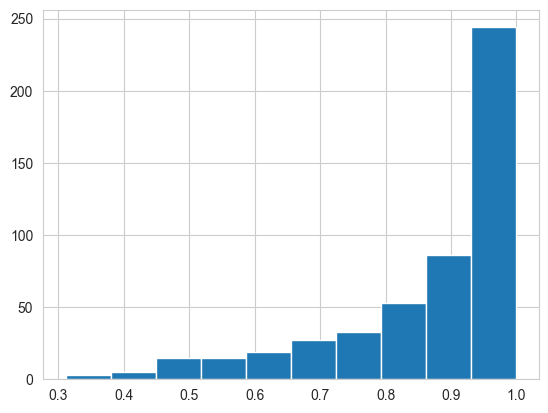

In [78]:
pred_df.max_val.hist()

In [79]:
pred_df[pred_df.max_val < 0.4]

,갈취 대화,기타 괴롭힘 대화,일반 대화,직장 내 괴롭힘 대화,협박 대화,max_val,label
110,0.396821,0.374814,0.012938,0.018834,0.196594,0.396821,갈취 대화
335,0.330875,0.184859,0.070092,0.021322,0.392853,0.392853,갈취 대화
414,0.077757,0.193596,0.107111,0.310877,0.310659,0.310877,직장 내 괴롭힘 대화
437,0.044478,0.320778,0.289502,0.035284,0.309958,0.320778,기타 괴롭힘 대화
478,0.248420,0.147870,0.009604,0.229386,0.364721,0.364721,갈취 대화


### 확신하지 못하는 데이터 -> 일반 데이터가 아닐까?

In [82]:
test_data.iloc[110].text

'내려놓고있기뭐해서 올린거야 응 어머니 캐리어 필요하시다며 문앞에둘테니까 가져가 배낭메고갈거래 짐다쌌어 알겠어 엄마 금토일 가는거였어 너일에 오전에가 새벽에가 그래 롤안해 응안해 아까 내 어떤 말에 기분이 나빴던거야  그거 모르는것도 기분이나빠 말해주면되잖아 내가 하는말 다 기분나빠겠지 아까말했어 근데 너가 그런식으로나온거지 진짜오늘일은 무조건 너잘못이야 나도 내가 일부러 안받는게아닌데 계속 그걸로 우리가 안좋게 이야기가 나오니까 기분이 안 좋아졌어 물론내가 너한테 말 안하고 빌려준게 잘못인건 알아 그래도 계속 그 얘기가 나오는게 싫어 너가 말안해도 생각나면 짜증나는데\n'

In [85]:
pred_df.iloc[82]

갈취 대화          0.176094
기타 괴롭힘 대화      0.077714
일반 대화          0.014419
직장 내 괴롭힘 대화    0.031981
협박 대화          0.699792
max_val        0.699792
label             갈취 대화
Name: 82, dtype: object

In [86]:
test_data.iloc[82]

text    천안 두정동 제이빌라 인데요, 지금 화재가 발생했어요. 빌라 어디에 불이 났나요? ...
pred    [[tensor(0.1761), tensor(0.0777), tensor(0.014...
Name: 82, dtype: object

In [88]:
pred_df.label.value_counts()

기타 괴롭힘 대화      188
갈취 대화          170
직장 내 괴롭힘 대화    117
일반 대화           25
Name: label, dtype: int64

In [89]:
pred_df.to_csv('pred_koelectra_add_data.csv', index=False)